In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [36]:
# Cargar datos desde CSV
mushroom = pd.read_csv('.\data\mushroom_cleaned.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Vicen\AppData\Local\Temp\ipykernel_5336\412197725.py:2: SyntaxWarning: invalid escape sequence '\d'
  mushroom = pd.read_csv('.\data\mushroom_cleaned.csv')


In [37]:
mushroom

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


Aplicar PCA para graficar

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Vicen\AppData\Local\Temp\ipykernel_5336\278882131.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('.\data\mushroom_cleaned.csv')


Componentes principales:
PC1:
  cap-diameter: 0.5864604064974127
  cap-shape: 0.27434187084079065
  gill-attachment: 0.2510652439406931
  gill-color: 0.2395891042460574
  stem-height: 0.046852716514712275
  stem-width: 0.5873687481242904
  stem-color: 0.20666826130332022
  season: 0.11296815067730642
  class: -0.24019416585451084
PC2:
  cap-diameter: 0.2240625221328056
  cap-shape: -0.10448951337823825
  gill-attachment: -0.08731280881358142
  gill-color: -0.14550167039945863
  stem-height: 0.7075856322496386
  stem-width: 0.1889190610758126
  stem-color: -0.23110656866618776
  season: -0.06416365506625103
  class: 0.5623065051922375
Varianza explicada por cada componente:
PC1: 0.24772734149053288
PC2: 0.1362951043756396
Característica más influyente en PC1: stem-width
Característica más influyente en PC2: stem-height


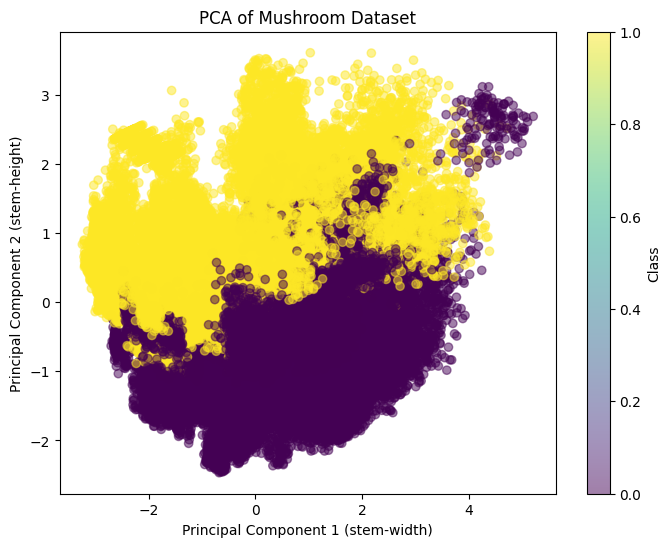

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('.\data\mushroom_cleaned.csv')

# Preprocesamiento de datos
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA(n_components=2)  # Reduciendo a 2 componentes principales
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Ver las componentes principales
components = pca.components_
print("Componentes principales:")
for i, component in enumerate(components):
    print(f"PC{i+1}:")
    for col, value in zip(df.columns, component):
        print(f"  {col}: {value}")

# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance}")

# Obtener los nombres de las características más influyentes para cada componente
feature_names = df.columns
pc1_top_feature = feature_names[np.argmax(np.abs(components[0]))]
pc2_top_feature = feature_names[np.argmax(np.abs(components[1]))]

print(f"Característica más influyente en PC1: {pc1_top_feature}")
print(f"Característica más influyente en PC2: {pc2_top_feature}")

# Graficar los datos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5, c=df['class'], cmap='viridis')
plt.xlabel(f'Principal Component 1 ({pc1_top_feature})')
plt.ylabel(f'Principal Component 2 ({pc2_top_feature})')
plt.title('PCA of Mushroom Dataset')
plt.colorbar(scatter, label='Class')
plt.show()


In [39]:
# Dividir los datos en características (X) y variable objetivo (y)
X = mushroom.drop('class', axis=1)
y = mushroom['class']

In [40]:
# Dividir dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Algoritmos de Clasificacion

# Regresion Logistica

In [41]:
# Regresion Logistica

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Vicen\anaconda3\envs\INFO257\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# coeficientes
feature_names = df.columns
coefficients = model.coef_[0]

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")



cap-diameter: -0.00010145989427950665
cap-shape: -0.12891350425550382
gill-attachment: -0.001813882144438668
gill-color: -0.007233866614679839
stem-height: 0.7922760654477522
stem-width: -0.0003257004534202761
stem-color: -0.055192118396084025
season: 0.10934758851217677


Un coeficiente positivo indica que a medida que el valor de la característica aumenta, la probabilidad de pertenecer a la clase objetivo también aumenta, mientras que un coeficiente negativo indica lo contrario.

In [43]:
print("Intercepto:", model.intercept_)

Intercepto: [0.99190924]


El término de intercepción es el valor de la función logística cuando todas las características son cero. En otras palabras, es el punto de inicio de la función de regresión.

In [44]:
intercepto = model.intercept_
probabilidad = 1 / (1 + np.exp(-intercepto))
print(f"Probabilidad: {probabilidad}")


Probabilidad: [0.72946487]


probabilidad de la clase objetivo cuando todas las características son cero.

In [45]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [46]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística en el conjunto de prueba: {:.2f}".format(accuracy))

Precisión del modelo de regresión logística en el conjunto de prueba: 0.63


In [47]:
# F1_score

from sklearn.metrics import f1_score

#y_test = [...]  # Etiquetas verdaderas
#y_pred = [...]  # Etiquetas predichas por tu modelo

f1 = f1_score(y_test, y_pred)

print("F1-score:", f1)

F1-score: 0.6828618140460619


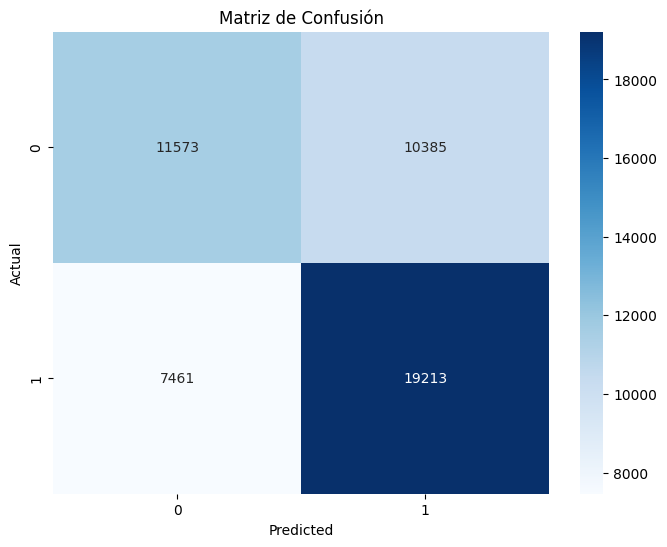

In [48]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [49]:
from sklearn.metrics import classification_report

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.61      0.53      0.56     21958
           1       0.65      0.72      0.68     26674

    accuracy                           0.63     48632
   macro avg       0.63      0.62      0.62     48632
weighted avg       0.63      0.63      0.63     48632



# Arbol de desicion

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Inicializar y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de Árbol de Decisión:", accuracy)


Accuracy del modelo de Árbol de Decisión: 0.9282982398420793


Matriz de Confusión:
[[20054  1904]
 [ 1583 25091]]


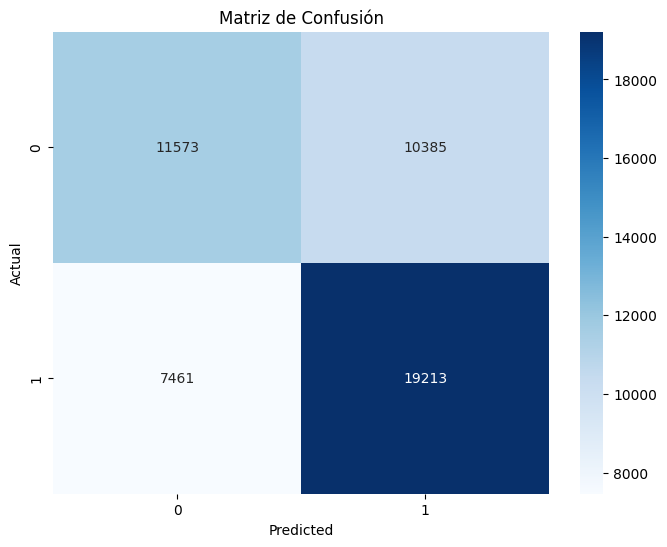

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     21958
           1       0.93      0.94      0.94     26674

    accuracy                           0.93     48632
   macro avg       0.93      0.93      0.93     48632
weighted avg       0.93      0.93      0.93     48632



In [52]:

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

Arbol de decision tiene un f1-score considerablemente mayor a comporacion de regresion logistica

# Método Ensemble: Bagging

In [19]:
from sklearn.ensemble import BaggingClassifier

In [20]:
from sklearn.preprocessing import StandardScaler
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo de ensamble Bagging con un árbol de decisión
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test_scaled)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     21958
           1       0.97      0.97      0.97     26674

    accuracy                           0.97     48632
   macro avg       0.97      0.97      0.97     48632
weighted avg       0.97      0.97      0.97     48632



# Maquinas de Soporte vertical

no recomendado para este dato debido a la mal escalabilidad del metodo, se demora mucho tiempo en inicializar y entrenar el modelo

In [53]:
from sklearn.svm import SVC

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
# Inicializar y entrenar el modelo SVM
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train, y_train)


In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

In [ ]:
# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo SVM:", accuracy)

In [ ]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print("Reporte de Clasificación:")
print(report)

# Red Neuronal

In [55]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

KeyboardInterrupt: 

In [ ]:
# Convertir las etiquetas a categóricas (one-hot encoding)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
# Escalar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta con 64 neuronas y activación ReLU
model.add(Dense(32, activation='relu'))  # Otra capa oculta con 32 neuronas y activación ReLU
model.add(Dense(y_categorical.shape[1], activation='softmax')) # Capa de salida con activación softmax para clasificación

c:\Users\Vicen\anaconda3\envs\INFO257\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9581 - loss: 0.1285 - val_accuracy: 0.9473 - val_loss: 0.1518
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9611 - loss: 0.1143 - val_accuracy: 0.9408 - val_loss: 0.1575
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9588 - loss: 0.1243 - val_accuracy: 0.9445 - val_loss: 0.1558
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9649 - loss: 0.1123 - val_accuracy: 0.9278 - val_loss: 0.1704
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9614 - loss: 0.1141 - val_accuracy: 0.9371 - val_loss: 0.1651
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9540 - loss: 0.1349 - val_accuracy: 0.9399 - val_loss: 0.1566
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9636 - loss: 0.1124 - val_accuracy: 0.9389 - val_loss: 0.1593
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9701 - loss: 0.1007 - val_accuracy: 0.

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')

1520/1520 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9507 - loss: 0.1358
Precisión en el conjunto de prueba: 0.95


In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

1520/1520 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
# Generar el informe de clasificación
report = classification_report(y_test_classes, y_pred_classes)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     21958
           1       0.97      0.94      0.95     26674

    accuracy                           0.95     48632
   macro avg       0.95      0.95      0.95     48632
weighted avg       0.95      0.95      0.95     48632



# Algoritmos de Regresion

# Regresion Lineal

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Vicen\AppData\Local\Temp\ipykernel_5336\1286043762.py:4: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('.\data\mushroom_cleaned.csv')


Coefficients: 
 [628.41230844  45.81714448  67.0570349  -53.96089567  -0.818742
  50.67623773 -27.07288423 -27.85933844]
Mean squared error: 182302.77
Coefficient of determination: 0.70


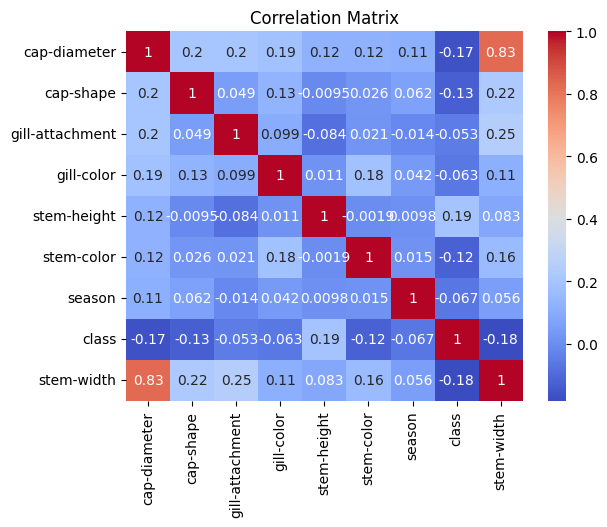

In [58]:
from sklearn.linear_model import LinearRegression

# Cargar el dataset
df = pd.read_csv('.\data\mushroom_cleaned.csv')

# Preprocesamiento de datos: codificar las características categóricas
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separar las características (X) y la variable objetivo (y)
X = df.drop('stem-width', axis=1)  # Reemplaza 'stem-width' con el nombre de tu variable objetivo si es diferente
y = df['stem-width']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo de regresión lineal
regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = regr.predict(X_test_scaled)

# Evaluar el modelo
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Calcular y mostrar la matriz de correlación
correlation_matrix = pd.DataFrame(X_train_scaled, columns=X.columns)
correlation_matrix['stem-width'] = y_train.values
corr_matrix = correlation_matrix.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


como da malos datos probemos hacer regresion lineal polinomial

# Arbol de Decision para regresion